In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [367]:
import mne

In [368]:
from statsmodels.tsa.ar_model import AutoReg

In [369]:
raw_data = mne.io.read_raw_edf("C:/Users/juleq/Downloads/S001R04.edf")

Extracting EDF parameters from C:\Users\juleq\Downloads\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [370]:
eeg_data = raw_data.get_data()

In [371]:
eeg_data.shape

(64, 20000)

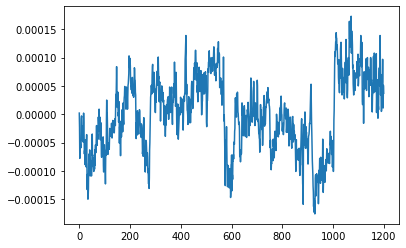

In [742]:
plt.plot(eeg_data[1][:1200])

In [711]:
noisyData = eeg_data.copy()
for i in noisyData:
  noise = np.random.normal(0, 1, len(i))*0.00005
  i += noise

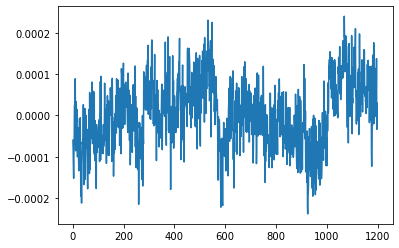

In [712]:
plt.plot(noisyData[1][:1200])

In [846]:
model = AutoReg(noisyData[1], lags = 8)
result = model.fit()
fitted_values = result.fittedvalues

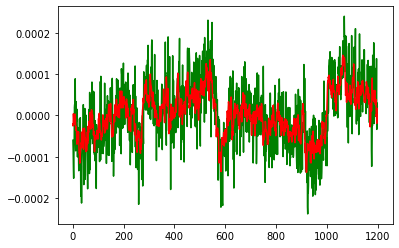

In [847]:

plt.plot(noisyData[1][:1200], color = 'green')
plt.plot(fitted_values[:1200], color = 'red')
#plt.plot(eeg_data[1][:1200],color='blue')

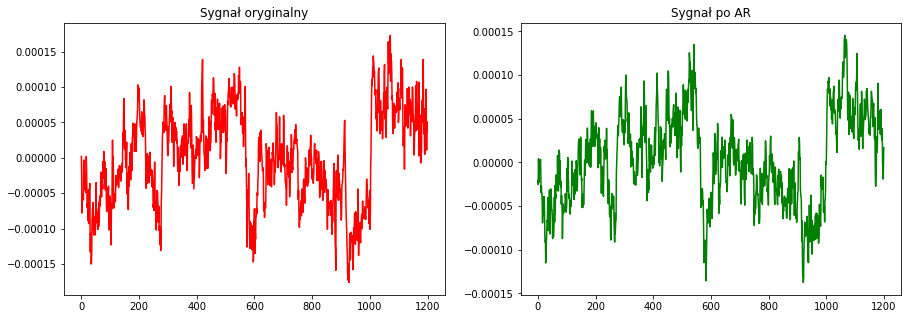

In [848]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(eeg_data[1][:1200],color='red')
plt.title('Sygnał oryginalny')
plt.subplot(1, 2, 2)
plt.plot(fitted_values[:1200],color='green')
plt.title('Sygnał po AR')
plt.show()

In [813]:
model_fit = model.fit()

In [378]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                20000
Model:                     AutoReg(3)   Log Likelihood               63729.292
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Sat, 07 May 2022   AIC                        -127448.584
Time:                        20:26:00   BIC                        -127409.067
Sample:                             3   HQIC                       -127435.655
                                20000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.16e-05   7.07e-05      1.013      0.311   -6.69e-05       0.000
y.L1           0.0117      0.007      1.653      0.098      -0.002       0.026
y.L2          -0.0057      0.007     -0.808      0.4